### Example 2: Red tide classification problem (large bloom, no bloom)
Decision trees with python (scikit-learn, and graphviz)

In [1]:
#General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import pydotplus
import joblib

#### [1] Import data
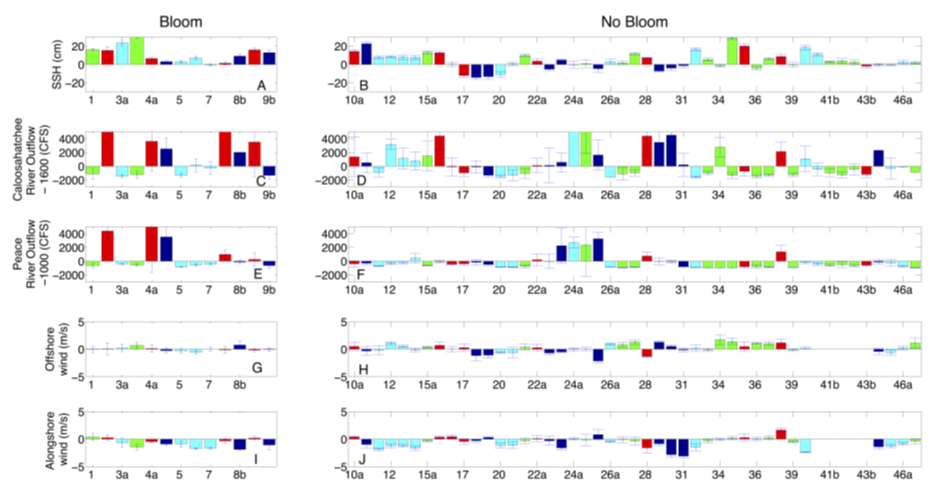 <br>
(1) fall (dark blue) <br>
(2) winter (light blue) <br>
(3) spring (green) <br>
(4) summer (red) <br>

In [1]:
import pandas as pd
df=pd.read_csv('river_data.csv')
display(df)

,agency_cd,site_no,measurement_nu,measurement_dt,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,discharge_va,measured_rating_diff,gage_va_change,gage_va_time,control_type_cd,discharge_cd
0,USGS,2292900,1,4/14/1966,NaN,Yes,JH,USGS,2.56,4270.0,Good,NaN,NaN,NaN,NONE
1,USGS,2292900,2,5/5/1966,NaN,Yes,H/F,USGS,2.94,4610.0,Good,NaN,NaN,NaN,NONE
2,USGS,2292900,3,5/16/1966,NaN,Yes,JH,USGS,2.95,2090.0,Fair,NaN,NaN,NaN,NONE
3,USGS,2292900,4,5/20/1966,NaN,Yes,JDW/NB,USGS,2.99,2060.0,Fair,NaN,NaN,NaN,NONE
4,USGS,2292900,5,7/21/1966,NaN,Yes,H/J,USGS,2.84,4890.0,Good,NaN,NaN,NaN,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,USGS,2292900,200,10/14/2020 11:06,EDT,Yes,MDM/DMS,USGS,NaN,1980.0,Fair,NaN,NaN,NaN,NONE
200,USGS,2292900,201,10/14/2020 13:39,EDT,Yes,MDM/DMS,USGS,NaN,1610.0,Poor,NaN,NaN,NaN,NONE
201,USGS,2292900,202,11/12/2020 10:20,EST,Yes,JGW/DJM,USGS,NaN,6000.0,Poor,NaN,NaN,NaN,NONE
202,USGS,2292900,203,11/12/2020 11:02,EST,Yes,JGW/DJM,USGS,NaN,5800.0,Poor,NaN,NaN,NaN,NONE


In [2]:
df=pd.read_csv('maze_data.csv')
display(df) 

,index,season,SSH,river_ch,river_pc,wind_os,wind_as,bloom,output
0,1,3,1,-1,-1,-1,1,1,large_bloom
1,2,4,1,1,1,1,1,1,large_bloom
2,3a,2,1,-1,-1,1,-1,1,large_bloom
3,3b,3,1,-1,-1,1,-1,1,large_bloom
4,4a,4,1,1,1,1,-1,1,large_bloom
5,4b,1,1,1,1,-1,-1,1,large_bloom
6,5,2,1,-1,-1,-1,-1,1,large_bloom
7,6,2,1,1,-1,-1,-1,1,large_bloom
8,7,2,1,-1,-1,0,-1,1,large_bloom
9,8a,4,1,1,1,-1,-1,1,large_bloom


#### [2] Clean and prepare data

In [3]:
# Predictor variables
X=df.drop(columns=['index','bloom','output'])
display(X)

#Target variable(or label, or predictand)
y=df.output
display(y)

,season,SSH,river_ch,river_pc,wind_os,wind_as
0,3,1,-1,-1,-1,1
1,4,1,1,1,1,1
2,2,1,-1,-1,1,-1
3,3,1,-1,-1,1,-1
4,4,1,1,1,1,-1
5,1,1,1,1,-1,-1
6,2,1,-1,-1,-1,-1
7,2,1,1,-1,-1,-1
8,2,1,-1,-1,0,-1
9,4,1,1,1,-1,-1


0     large_bloom
1     large_bloom
2     large_bloom
3     large_bloom
4     large_bloom
5     large_bloom
6     large_bloom
7     large_bloom
8     large_bloom
9     large_bloom
10    large_bloom
11    large_bloom
12    large_bloom
13       no_bloom
14       no_bloom
15       no_bloom
16       no_bloom
17       no_bloom
18       no_bloom
19       no_bloom
20       no_bloom
21       no_bloom
22       no_bloom
23       no_bloom
24       no_bloom
25       no_bloom
26       no_bloom
27       no_bloom
28       no_bloom
29       no_bloom
30       no_bloom
31       no_bloom
32       no_bloom
33       no_bloom
34       no_bloom
35       no_bloom
36       no_bloom
37       no_bloom
38       no_bloom
39       no_bloom
40       no_bloom
41       no_bloom
42       no_bloom
43       no_bloom
44       no_bloom
45       no_bloom
46       no_bloom
47       no_bloom
48       no_bloom
49       no_bloom
50       no_bloom
51       no_bloom
52       no_bloom
53       no_bloom
54       no_bloom
55       n

#### [3] Split data 

In [11]:
#Split to train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# #Save splitted data
# X_train.to_csv('X_train.csv') 
# X_test.to_csv('X_test.csv') 
# y_train .to_csv('y_train.csv') 
# y_test.to_csv('y_test.csv') 

#Display data
display(X_train)
display(y_train)

,season,SSH,river_ch,river_pc,wind_os,wind_as
35,3,1,-1,-1,1,-1
42,3,1,-1,-1,-1,-1
41,2,1,-1,-1,1,-1
40,1,-1,1,-1,-1,-1
58,2,1,-1,-1,1,-1
32,3,1,1,1,0,-1
37,4,1,1,1,-1,-1
11,4,1,1,1,-1,1
45,4,1,-1,-1,1,1
24,1,-1,-1,-1,-1,1


35       no_bloom
42       no_bloom
41       no_bloom
40       no_bloom
58       no_bloom
32       no_bloom
37       no_bloom
11    large_bloom
45       no_bloom
24       no_bloom
0     large_bloom
38       no_bloom
28       no_bloom
27       no_bloom
33       no_bloom
19       no_bloom
55       no_bloom
44       no_bloom
13       no_bloom
31       no_bloom
54       no_bloom
18       no_bloom
26       no_bloom
5     large_bloom
36       no_bloom
50       no_bloom
21       no_bloom
8     large_bloom
3     large_bloom
57       no_bloom
6     large_bloom
17       no_bloom
47       no_bloom
16       no_bloom
30       no_bloom
51       no_bloom
52       no_bloom
48       no_bloom
53       no_bloom
9     large_bloom
2     large_bloom
12    large_bloom
29       no_bloom
25       no_bloom
22       no_bloom
7     large_bloom
34       no_bloom
15       no_bloom
Name: output, dtype: object

#### [4] Create, train, evaluate and save model 

In [43]:
#Split to train and test
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# Define model: decision treee  
#model=DecisionTreeClassifier()
model=RandomForestClassifier()

#Train model 
model.fit(X_train,y_train)

#Make predictions
y_pred=model.predict(X_test)

#Evalaute predictions
#fine tune the model, choose another algorithm or model, or application<br>
#Accuracy:size_train_dataset, clean data (duplicates, missing data), irrelevent data
score=accuracy_score(y_test,y_pred)
print('Accuracy: {:0.2f}'.format(score))

#Save model to a file 
#joblib.dump(model,'Redtide_Bloom_Pred.joblib')

Accuracy: 0.67


#### [5] Model interpretation
https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952<br>
Plot decision tree starting from root+decision node, to decision node, and to terminal node (leaf).<br>
Pure node means further spliting will not lead to further information gain, so classification trees do noy split on pure nodes.However, impure nodes can split further.<br>
The figure shows that setosa was correctly classified for all 12 points.The right side shows that many points are misclassified as no_bloom.<br>
Classification trees are a greedy algorithm which means by default it will continue to split until it has a pure node.<br> 
The algorithm chooses the best split point (i.e., gini) for the impure node.<br>
Decision trees split on the feature that results in the largest information gain (e.g., gini or entropy criterion).<br>
IG = information before splitting (parent) — information after splitting (children).<br>
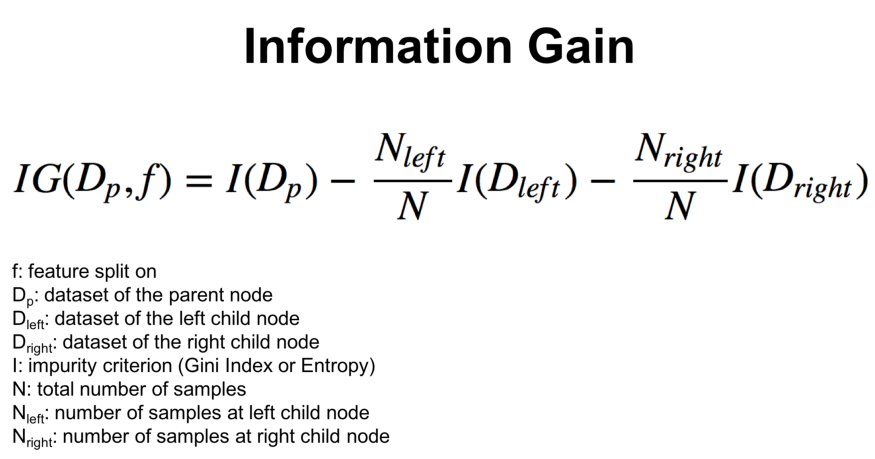<br>
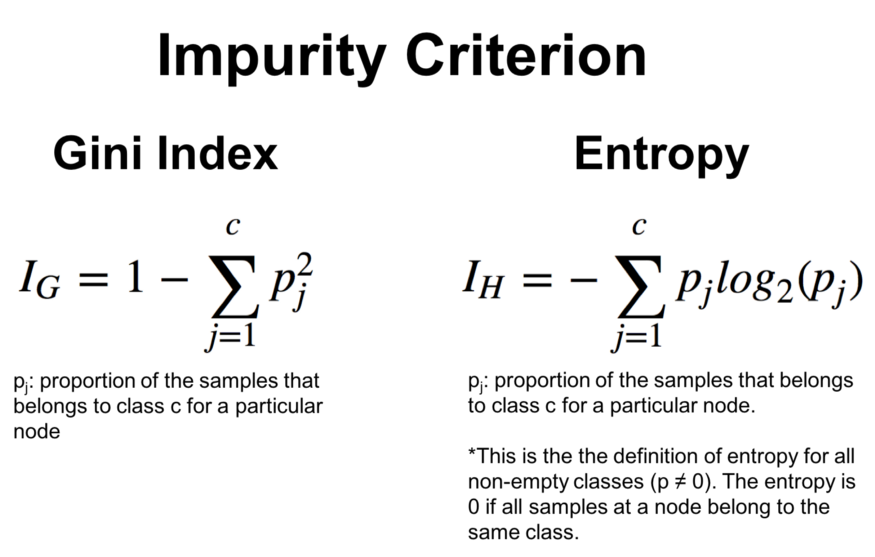<br>
If the impurity criterion is not zero then we can furthr split.

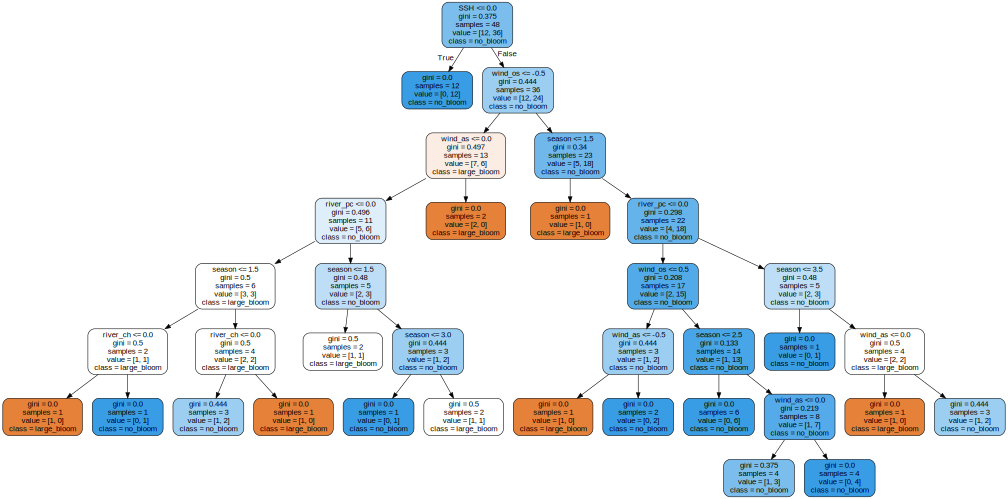

In [270]:
#load model from a file
model=joblib.load('Redtide_Bloom_Pred.joblib')

#Export model in visual format (to know how the model makes predictions)
dot_data=tree.export_graphviz(model,out_file=None, max_depth=None,label='all',rounded=True,filled=True,
                     feature_names=['season','SSH','river_ch','river_pc','wind_os','wind_as'],class_names=sorted(y.unique()))

#pydot to resize and saving 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"14,14!"')

#graphviz for screen display 
graphviz.Source(pydot_graph.to_string())

